In [1]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy import constants as const
from astropy import units as u
#import tycholib_jupyter as tj
#import imp
#import nbimporter
import sys, os, glob
sys.path.append(os.path.abspath(os.path.join('..', 'Scripts_astro')))
#import tycholib_jupyter as tj
#imp.reload(tj)
import math
import json
from astropy.io import ascii
import matplotlib.gridspec as gridspec # For spacing subplots
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.coordinates import SkyCoord
import math
import time
from astropy.visualization import (LogStretch, ImageNormalize, SqrtStretch)
from astropy.io import ascii
import pandas as pd
from astropy.coordinates import Angle
from collections import OrderedDict#


In [2]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [3]:
plt.rc('font', family='Palatino',size=25)

### Sensitivity to timescales (Lee 2020)

In [151]:
oph_tab = np.loadtxt('Oph_Mardones2019_1_B7.txt',unpack=False,dtype='str',delimiter='\t') 
output_name= 'Oph_B7_1.txt'

In [152]:
col_names = ['name','ra_sex','dec_sex','vlsr']
band3 = pd.DataFrame(columns  = col_names)
band6 = pd.DataFrame(columns  = col_names)

In [153]:
tab = oph_tab
for i in range(len(tab)):
    
    #name
    
    name = tab[i,1]
    name = name.replace(" ", "")
    ra_sex = tab[i,4]
    ra_sex = ra_sex.replace(" ", "").replace('h',':').replace('m',':').replace('s','')
    dec_sex = tab[i,5]
    dec_sex = dec_sex.replace(" ", "").replace('d',':').replace('m',':').replace('s','')
    vlsr = 5.2

    
    band3.loc[i] = [name,ra_sex,dec_sex,vlsr]

In [154]:
#band3=band3.drop(index=[35,37])
with open(output_name, "w") as text_file:
    sample = band3
    print (sample)
    sample = sample.reset_index()
    sample = sample.drop(columns=['index'])
    for i in range(len(sample)):
        print("%s, %s, %s, 0.0, 0.0, %.2f, lsrk, RADIO, 0.24, 10, 0, 0, 3, 0,0"%(sample.loc[i,'name'],\
                                                                                sample.loc[i,'ra_sex'],\
                                                                                sample.loc[i,'dec_sex'],\
                                                                                sample.loc[i,'vlsr']),\
              file=text_file)

      name       ra_sex      dec_sex  vlsr
0   Oph_41  16:33:55.60  -24:42:05.0   5.2
1   Oph_40  16:32:22.60  -24:28:31.0   5.2
2   Oph_39  16:32:00.90  -24:56:42.0   5.2
3   Oph_38  16:31:52.40  -24:55:36.0   5.2
4   Oph_37  16:31:52.00  -24:57:26.0   5.2
5   Oph_36  16:31:43.70  -24:55:24.0   5.2
6   Oph_35  16:31:36.70  -24:04:19.0   5.2
7   Oph_34  16:31:35.60  -24:01:29.0   5.2
8   Oph_33  16:28:57.80  -24:40:54.0   5.2
9   Oph_32  16:28:21.60  -24:36:23.0   5.2
10  Oph_31  16:27:39.80  -24:43:15.0   5.2
11  Oph_30  16:27:37.20  -24:42:37.0   5.2
12  Oph_29  16:27:30.10  -24:27:43.0   5.2
13  Oph_28  16:27:28.40  -24:27:21.0   5.2
14  Oph_27  16:27:27.90  -24:39:33.0   5.2
15  Oph_26  16:27:26.90  -24:40:50.0   5.2
16  Oph_25  16:27:24.50  -24:41:03.0   5.2
17  Oph_24  16:27:21.80  -24:27:27.0   5.2
18  Oph_23  16:27:21.40  -24:41:43.0   5.2
19  Oph_22  16:27:17.50  -24:28:56.0   5.2
20  Oph_21  16:27:15.80  -24:38:43.0   5.2
21  Oph_20  16:27:09.40  -24:37:18.0   5.2
22  Oph_19 

### 1 arcsec sample

In [34]:
col_names = ['name','ra_sex','dec_sex','vlsr']
band3 = pd.DataFrame(columns  = col_names)
tab = oph_tab_1as
for i in range(len(oph_tab_1as)):
    
    #name
    
    name = tab[i,1]
    name = name.replace(" ", "")
    ra_sex = tab[i,4]
    ra_sex = ra_sex.replace(" ", "").replace('h',':').replace('m',':').replace('s','')
    dec_sex = tab[i,5]
    dec_sex = dec_sex.replace(" ", "").replace('d',':').replace('m',':').replace('s','')
    vlsr = 5.2

    
    band3.loc[i] = [name,ra_sex,dec_sex,vlsr]


NameError: name 'oph_tab_1as' is not defined

In [35]:
with open("ot_input_class0_I_band3_1as.txt", "w") as text_file:
    sample = band3
    print (sample)
    sample = sample.reset_index()
    sample = sample.drop(columns=['index'])
    for i in range(len(sample)):
        print("%s, %s, %s, 0.0, 0.0, %.2f, lsrk, RADIO, 0.24, 10, 0, 0, 3, 0,0"%(sample.loc[i,'name'],\
                                                                                sample.loc[i,'ra_sex'],\
                                                                                sample.loc[i,'dec_sex'],\
                                                                                sample.loc[i,'vlsr']),\
              file=text_file)

Empty DataFrame
Columns: [name, ra_sex, dec_sex, vlsr]
Index: []


# Spectral index plot

In [10]:
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 7
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30


In [11]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a+b*x
def loglog(x,a,b):
    return 10**(b*np.log10(x)+a)

[ 1.77452054 -1.59374322]


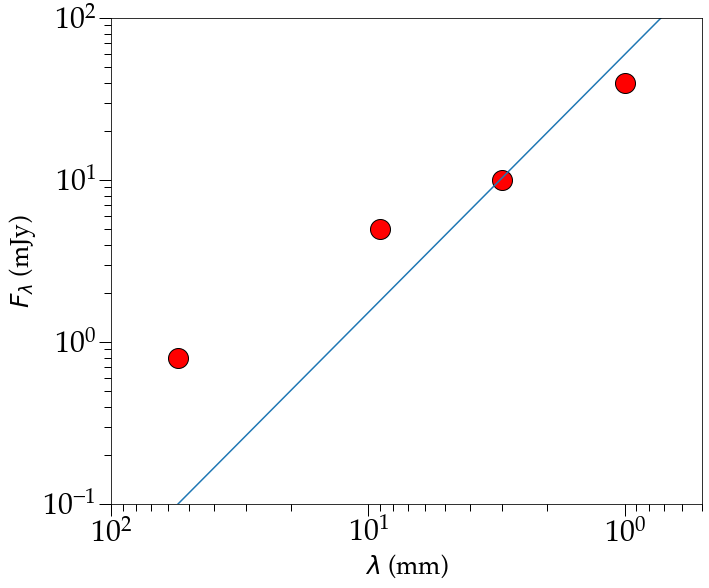

In [12]:
fig = plt.figure(figsize=(10,9))
ax = fig.add_axes([0.15,0.15,0.82,0.75])


wvl = [0.9,1,3,9,55]
flux = [70,60,10,2,0.4]

ax.plot([1],[40],'.',markersize=40,color='red',markeredgewidth=1,markeredgecolor='black')
ax.plot([3],[10],'.',markersize=40,color='red',markeredgewidth=1,markeredgecolor='black')
ax.plot([9],[5],'.',markersize=40,color='red',markeredgewidth=1,markeredgecolor='black')
ax.plot([55],[0.8],'.',markersize=40,color='red',markeredgewidth=1,markeredgecolor='black')





popt,pcov = curve_fit(loglog,wvl,flux)
print (popt)
xx = np.logspace(-1,4)
ax.plot(xx,loglog(xx,popt[0],popt[1]))



#ax.plot(xx,loglog(xx,popt[0],-1.2))


plt.xlim([1e2,5e-1])
plt.ylim([1e-1,1e2])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$ (mm)')
plt.ylabel('$F_\lambda$ (mJy)')

plt.show()


In [13]:
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 7
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 7
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30


In [14]:
plt.rcParams['axes.linewidth'] =2 #set the value globally
plt.rcParams['xtick.major.size']= 10
plt.rcParams['xtick.major.width']= 2
plt.rcParams['xtick.minor.size']= 6
plt.rcParams['xtick.minor.width']= 2
plt.rcParams['ytick.major.size']= 10
plt.rcParams['ytick.major.width']= 2
plt.rcParams['ytick.minor.size']= 6
plt.rcParams['ytick.minor.width']= 2

### Perseus

NameError: name 'df_Per' is not defined

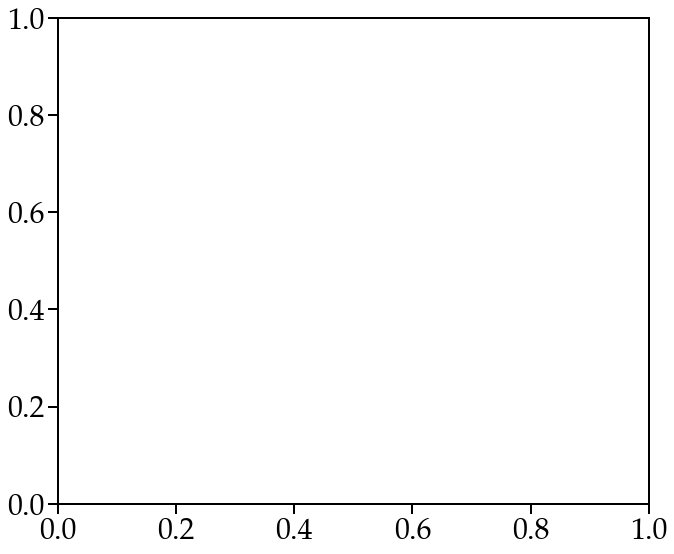

In [15]:
fig = plt.figure(figsize=(10,9))
ax = fig.add_axes([0.15,0.15,0.82,0.75])

sample = df_Per.loc[(df_Per['class_label']=='Class 0') & (df_Per['ehv']=='y')]
ax.plot(sample['tbol'],sample['lbol'],'*',markersize=20,color='#4b45e0',label='jet')

print (len(sample))

sample = df_Per.loc[(df_Per['class_label']=='Class 0') & (df_Per['ehv']=='?')]
ax.plot(sample['tbol'],sample['lbol'],'+',markersize=15,color='#87b5eb',alpha=1.0,label='not verified')

print (len(sample))


#sample = df_Per.loc[(df_Per['class_label']=='Class I') & (df_Per['coms']=='y')]
#ax.plot(sample['tbol'],sample['lbol'],'*',color='r',markersize=24)

#sample = df_Per.loc[(df_Per['class_label']=='Class I') & (df_Per['coms']=='n')]

#ax.plot(sample['tbol'],sample['lbol'],'.',color='r',markersize=12)



ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel ('T$_{\\rm bol}$ (K)')
ax.set_ylabel ('L$_{\\rm bol}$ (L$_{\\odot}$)')
plt.title ('Perseus Class 0')
plt.legend()
plt.savefig('Perseus_sample.png')
plt.show()

plt.show()